<a href="https://colab.research.google.com/github/AMMLRepos/heart-failure-detection/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To predict a possible death event in a case of heart failure of a person 

#Dataset 
We will use public dataset available on [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

#Major Steps 
- Download data 
- Setup libraries 
- Perform basic analysis 
- Split train and test set 
- Train model 
- Predict 
- Publish and expose as an API




In [2]:
!pip install opendatasets --quiet

#Download dataset from Kaggle
To download dataset from kaggle, we will use [opendatasets library](https://github.com/JovianML/opendatasets) developed by jovian

In [3]:
import opendatasets as od
import os 

dataset_url = 'https://www.kaggle.com/andrewmvd/heart-failure-clinical-data'
od.download(dataset_url)

data_dir = os.listdir()[1]
filename = os.listdir("./heart-failure-clinical-data")[0]
file_path = "./" + data_dir + "/" + filename

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aashaymaheshwari
Your Kaggle Key: ··········


100%|██████████| 3.97k/3.97k [00:00<00:00, 861kB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_theme(style = "darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [6]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
raw_heart_df = pd.read_csv(file_path)

In [8]:
print(raw_heart_df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.0        0                       582         0                 20                    1  265000.00               1.9           130    1        0     4            1
1    55.0        0                      7861         0                 38                    0  263358.03               1.1           136    1        0     6            1
2    65.0        0                       146         0                 20                    0  162000.00               1.3           129    1        1     7            1
3    50.0        1                       111         0                 20                    0  210000.00               1.9           137    1        0     7            1
4    65.0        1                       160         1                 20                    0  327000.00               2.7           116    0   

In [9]:
print(raw_heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [10]:
print(raw_heart_df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  ejection_fraction  high_blood_pressure      platelets  serum_creatinine  serum_sodium         sex    smoking        time  DEATH_EVENT
count  299.000000  299.000000                299.000000  299.000000         299.000000           299.000000     299.000000         299.00000    299.000000  299.000000  299.00000  299.000000    299.00000
mean    60.833893    0.431438                581.839465    0.418060          38.083612             0.351171  263358.029264           1.39388    136.625418    0.648829    0.32107  130.260870      0.32107
std     11.894809    0.496107                970.287881    0.494067          11.834841             0.478136   97804.236869           1.03451      4.412477    0.478136    0.46767   77.614208      0.46767
min     40.000000    0.000000                 23.000000    0.000000          14.000000             0.000000   25100.000000           0.50000    113.000000    0.000000    0.00000    4.00000

# Visualization to understand basic relationships 

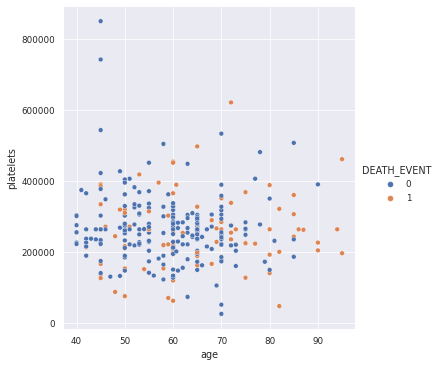

In [ ]:
sns.relplot(x = "age", y = "platelets", hue = "DEATH_EVENT", data = raw_heart_df);

In [ ]:
raw_heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


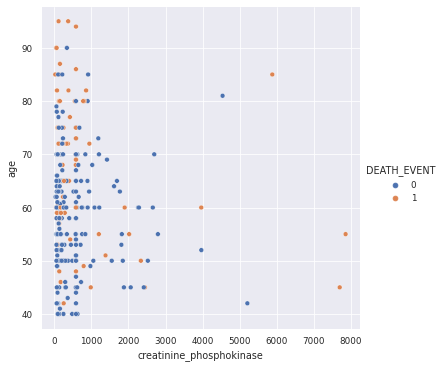

In [ ]:
sns.relplot(x = "creatinine_phosphokinase", y = "age", hue = "DEATH_EVENT", data = raw_heart_df)

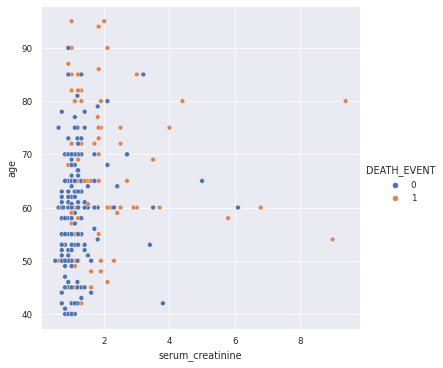

In [ ]:
sns.relplot(x = "serum_creatinine", y = "age", hue = "DEATH_EVENT", data = raw_heart_df)

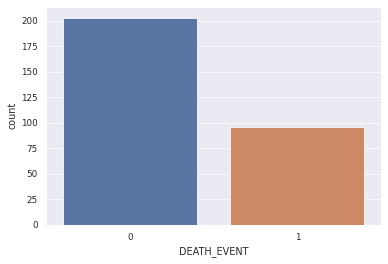

In [ ]:
sns.countplot(x = "DEATH_EVENT", data = raw_heart_df)

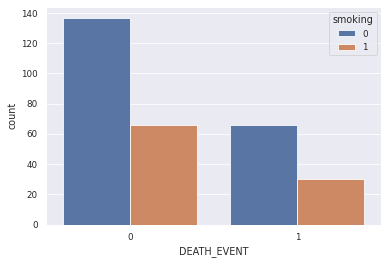

In [ ]:
sns.countplot(x = "DEATH_EVENT", hue="smoking", data = raw_heart_df)

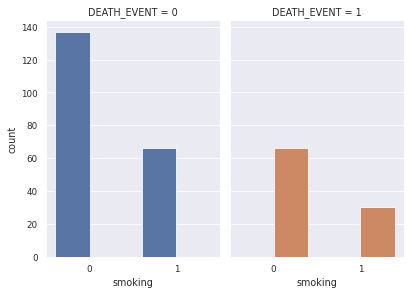

In [ ]:
sns.catplot(x = "smoking", hue="DEATH_EVENT", col = "DEATH_EVENT",data = raw_heart_df, kind="count", height=4, aspect=.7);

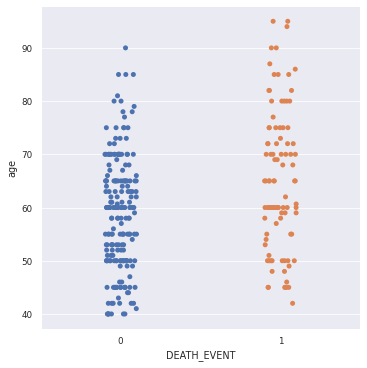

In [ ]:
sns.catplot(x = "DEATH_EVENT", y = "age", data = raw_heart_df)

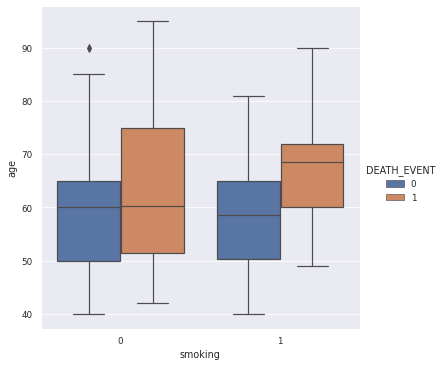

In [ ]:
sns.catplot(x = "smoking", y = "age", hue = "DEATH_EVENT", kind = "box", data = raw_heart_df)

# Let us identify the correlation between all features 

In [ ]:
raw_heart_df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


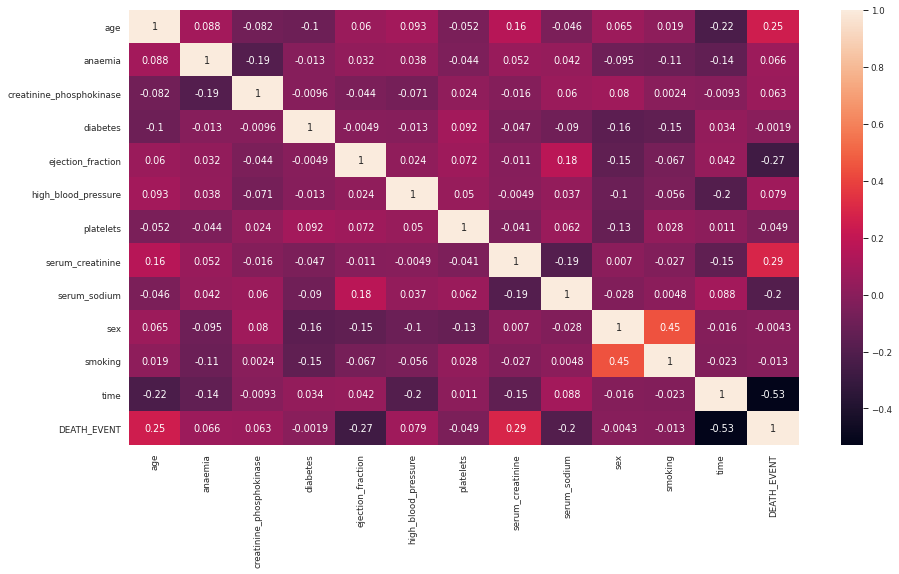

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(raw_heart_df.corr(), annot=True)

#Prepare your data for training 
- Split your data in train, validation and testing dataset 
- Seperate features and target label

Our target label is DEATH_EVENT and features are all other parameters available in the dataset. Please note that based on proper analysis and expert advice, we can remove certain columns which domain experts thinks will have no impact on heart failure but since we have no one, we will just go ahead and train our model with all available features. 

#Which model to use ?
This is a classification problem where we need to detect if patient will be dead(1) or will not be dead (0). There are multiple algorithms for classification problems - 
- Logistic Regression 
- KNN Algorithm
- Decision Trees
- Random Forest 
- etc. 

We will use Decision Trees at first place to train the model and see how it works in terms of accuracy.

#Preparing data
Preparing data can have multiple activities like - 
- Clean missing values by replacing by mean, mode, etc. or by removing rows 
- Separate features and labels 
- Perform scaling in case numericals values in different columns are in a huge range which can impact the error calculation 
- Separate train, test and validation data 


We have a very small dataset with no missing data and hence we need not perform any operation for missing values. We will perform all other activities as mentioned above 

Separate features and labels 

In [14]:
# X -> Dataset with features, y = target column or label
X = raw_heart_df.drop('DEATH_EVENT', axis = 1)
y = raw_heart_df['DEATH_EVENT']

Let us check the shape and type of both these parameters

In [17]:
print("Shape of X - ", X.shape)
print("Shape of y - ", y.shape)

Shape of X -  (299, 12)
Shape of y -  (299,)


Clearly we have 299 rows in X and 12 feature columns. We have 299 rows in y with only 1 column which is the label

In [18]:
print("Type of X - ", type(X))
print("Type of y - ", type(y))

Type of X -  <class 'pandas.core.frame.DataFrame'>
Type of y -  <class 'pandas.core.series.Series'>


Let us know split the data into train and test dataset

In [22]:
print(raw_heart_df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.0        0                       582         0                 20                    1  265000.00               1.9           130    1        0     4            1
1    55.0        0                      7861         0                 38                    0  263358.03               1.1           136    1        0     6            1
2    65.0        0                       146         0                 20                    0  162000.00               1.3           129    1        1     7            1
3    50.0        1                       111         0                 20                    0  210000.00               1.9           137    1        0     7            1
4    65.0        1                       160         1                 20                    0  327000.00               2.7           116    0   

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [28]:
print("Type of X_train - ", type(X_train))
print("Type of X_test - ", type(X_test))
print("Type of y_train - ", type(y_train))
print("Type of y_test - ", type(y_test))

Type of X_train -  <class 'pandas.core.frame.DataFrame'>
Type of X_test -  <class 'pandas.core.frame.DataFrame'>
Type of y_train -  <class 'pandas.core.series.Series'>
Type of y_test -  <class 'pandas.core.series.Series'>


In [29]:
print("Shape of X_train - ", X_train.shape)
print("Shape of X_test - ", X_test.shape)
print("Shape of y_train - ", y_train.shape)
print("Shape of y_test - ", y_test.shape)

Shape of X_train -  (239, 12)
Shape of X_test -  (60, 12)
Shape of y_train -  (239,)
Shape of y_test -  (60,)


Train the model

In [30]:
from sklearn.tree import DecisionTreeClassifier
housing_model = DecisionTreeClassifier(max_depth = 2)
housing_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's make a prediction for our train data. Please note that we have trained our model using the same data and hence this should perform well 

In [31]:
housing_model.predict(X_train)

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])